<a href="https://colab.research.google.com/github/2147118Joshua/Predicting-Exoplantes-using-TESS-data-/blob/main/TIC_55525572__Binning_Transit_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
!pip install lightkurve

In [3]:
import matplotlib.pyplot as plt
import lightkurve as lk

In [4]:
TIC = 'TIC 55525572'

In [10]:
print (lk.search_lightcurve(TIC, author = 'SPOC'))

SearchResult containing 24 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 04 2018   SPOC     120    55525572      0.0
  1 TESS Sector 05 2018   SPOC     120    55525572      0.0
  2 TESS Sector 06 2018   SPOC     120    55525572      0.0
  3 TESS Sector 08 2019   SPOC     120    55525572      0.0
  4 TESS Sector 09 2019   SPOC     120    55525572      0.0
  5 TESS Sector 10 2019   SPOC     120    55525572      0.0
  6 TESS Sector 11 2019   SPOC     120    55525572      0.0
  7 TESS Sector 12 2019   SPOC     120    55525572      0.0
  8 TESS Sector 13 2019   SPOC     120    55525572      0.0
  9 TESS Sector 27 2020   SPOC      20    55525572      0.0
...            ...  ...    ...     ...         ...      ...
 14 TESS Sector 30 2020   SPOC     120    55525572      0.0
 15 TESS Sector 31 2020   SPOC     120    55525572      0

In [14]:
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')
lc_collection = available_data_select.download_all()


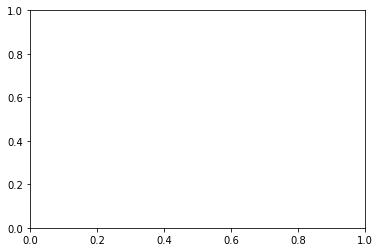

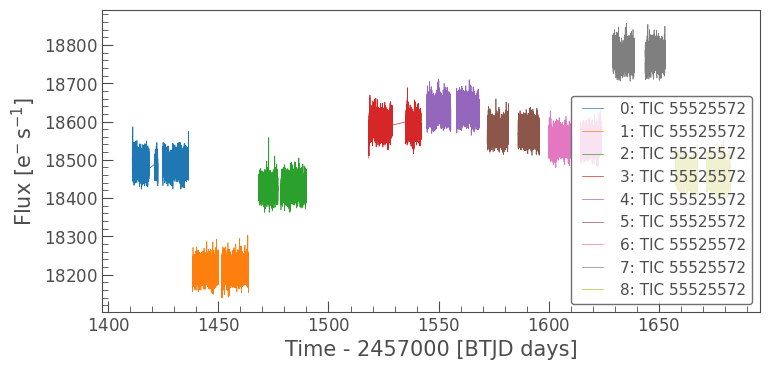

In [20]:
fig, ax = plt.subplots()
lc_collection.plot()

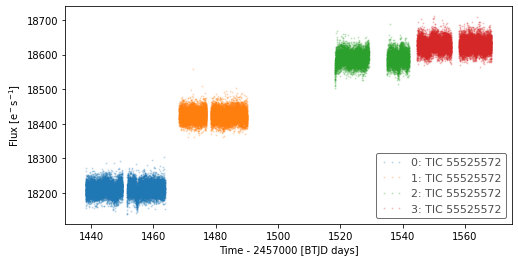

In [24]:
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[1:5]
lc_collection = available_data_select.download_all()
fig, ax = plt.subplots(figsize = (8,4))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.2)

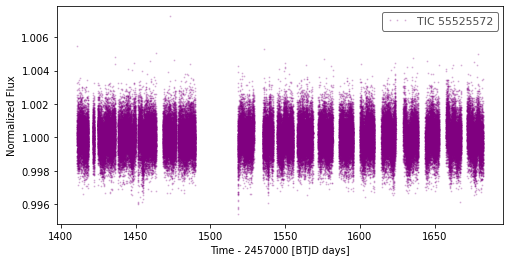

In [26]:
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9]
lc_collection = available_data_select.download_all().stitch()
fig, ax = plt.subplots(figsize = (8,4))
lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.2)

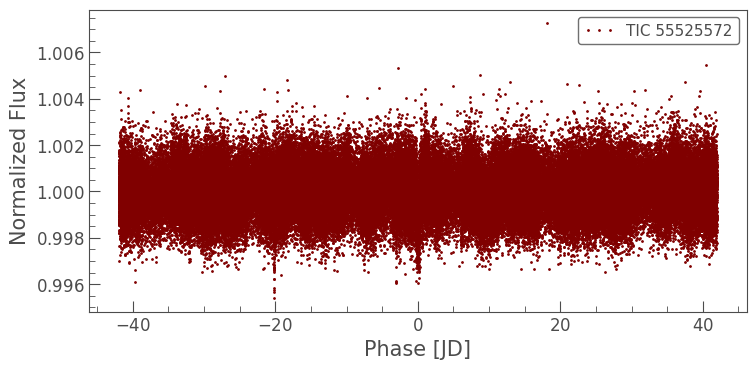

In [28]:
period = 83.8979 #number of time for one orbit ,  could be seen in the mast.org  This is the time between transit events (duration of a year on this planet)
t0 = 2125.847 # This is time of one of the transit events (is doesn't have to tbe the first one)
lc_phased = lc_collection.fold(period = period, epoch_time = t0)
lc_phased.plot(linewidth =0, color = 'maroon', marker = '.')

(0.996, 1.004)

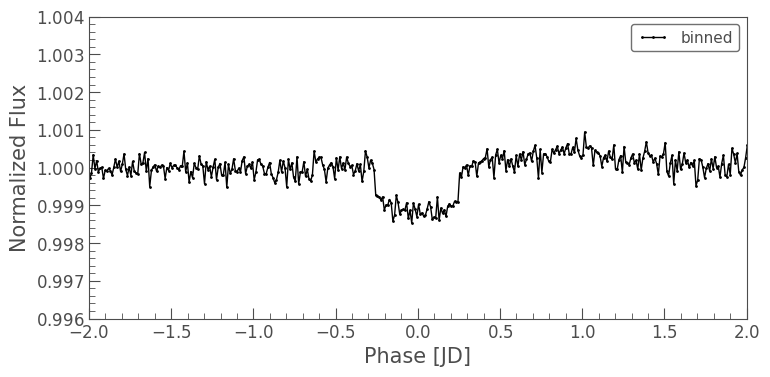

In [29]:
# we can bin the phase folded data to make the transit more obvious (watch the episode on binning for more information on this)
lc_phased_binned = lc_phased.bin(15/24/60)
lc_phased_binned.plot(marker = 'o', linewidth = 1, color = 'k', alpha = 1, markersize = 1, label = 'binned')
plt.xlim(-2,2)
plt.ylim(0.996, 1.004)

Text(0.5, 1.0, 'Phased-Folded Plot, Period: 16.330 days, t0 = 2674.522')

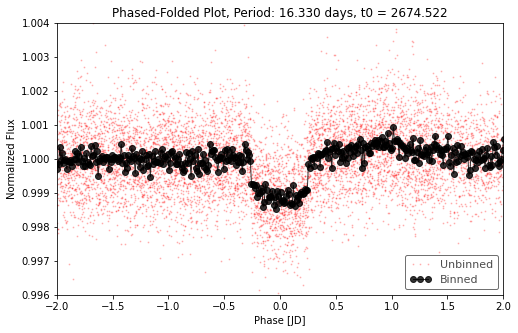

In [36]:
fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 2, label = 'Unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 1, color = 'black', alpha = 0.8, markersize = 6, label = 'Binned')

# set x and y axis limits (for different targets these limits will be different!)
plt.xlim(-2,2)
plt.ylim(0.996, 1.004)
plt.title("Phased-Folded Plot, Period: 16.330 days, t0 = 2674.522")